In [2]:
import numpy as np                 #loading in numpy
from matplotlib import pyplot as plt      #load matplotlib
import math                        # load math 
#this makes matplotlib plots appear in the notebook (instead of a separate window)
%matplotlib inline

## Couette Flow of Incompressible Flow: Pressure Correction Method
We will now look at another way to solve the Couette flow problem presented in Chapter 9 of The pressure correction method looks at sovling the problem in two dimensions. Although our problem still consists of twho infinitely long flat plates, our computational plane is finite. In this case we will construct a 2D model that is 0.5 ft long and 0.01 ft tall.The upper surface will be moving at some velocity $u_e$ and the density of our fluid will be 0.002377 slug/ft^3. The value of $u_e$ will be set to 1 ft/set resulting in a Retnolds number of 63.6. We will build the grid by staggering three different grids for velocity in x, velocity in y, and pressure. The plot below shows the make up of the different grids. Individually, each grid will have their own index, but the will be staggered in relation to eachother. 

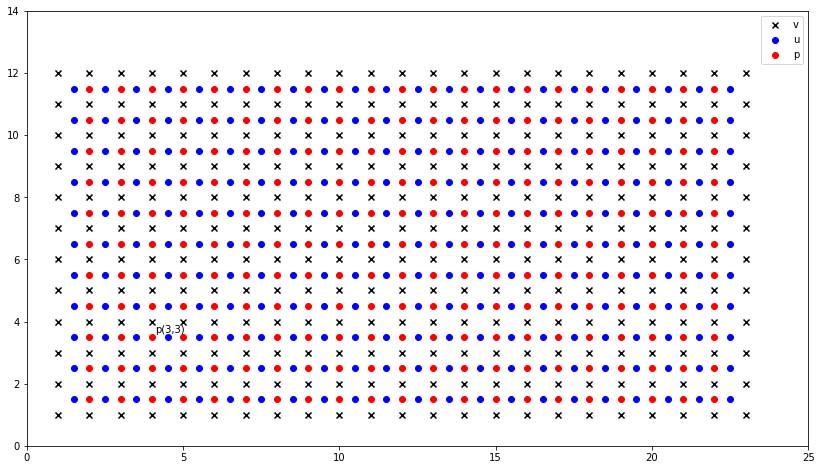

In [3]:
plt.figure(figsize=(14,8))
xvalues = np.linspace(1,23,23);
yvalues = np.linspace(1,12,12);
vx, vy = np.meshgrid(xvalues, yvalues)
fig = plt.scatter(vx, vy, marker='x', color='k',label='v')
xvalues = np.linspace(1,22,22)+0.5;
yvalues = np.linspace(1,11,11)+0.5;
vx, vy = np.meshgrid(xvalues, yvalues)
fig = plt.scatter(vx, vy, marker='o', color='b',label='u')
xvalues = np.linspace(1,21,21)+1;
yvalues = np.linspace(1,11,11)+0.5;
vx, vy = np.meshgrid(xvalues, yvalues)
fig = plt.scatter(vx, vy, marker='o', color='r',label='p')
plt.xlim([0,25])
plt.ylim([0,14])
plt.text(4.1,3.65,'p(3,3)')
plt.legend()

The grids will have the followig dimensions:

Pressure: 21 x 11

u (velocity in x): 22x11

v (velocity in y): 23x12

For the pressure correction method, we will use the notation of $*$ to denote a guessed value. The basic steps for this method is:

**1.** Guess pressure $p^*$

**2.** Use guessed pressure $p^*$ to get $u^*$ and $v^*$

**3.** Substitude $p^*$, $u^*$, and $v^*$ into the continuity equation. Use the continum equaiton to construct a pressure correction $p'$. Then our corrected pressures and corresponding flow variables will be:

$$p=p^* + p'$$

$$u=u^* + u'$$

$$v=v^* + v'$$

**4.** The corrected value of $p$ is the new $p^*$ and we will go back to step 2 and iterate until we have a flow field that satisfies th continuity equation.

Because this is an iterative solution, we need to state our initial conditions. For all nodes except (i,j)=(15,5), the values are:

$$u =v =0$$

$$p^* = p' =0$$

The boundary values are set as:

Upper wall:

$u = u_e$

$v=0$

Lower wall:

$u = v = 0$

Inflow:

$p' =0$

$v=0$

Outflow:

$p'=0$

These boundary conditions are held constant through the entire iteration process. The variables not stated as constant in these boundary condition are allowed to float. Additionally, instead of enforcing a zero-pressure gradient at the wall, we will enfore that that at the wall $p'=0$. A constant pressure gradient is allowable here because the steady state solution has a uniform pressure.

Now we must address the condition at (15,5). At this point in our grid, we will set $v = 0.5$ $ft/sec$. this is one half of the velocity at the upper wall boundary condition. This is called a "velocity spike", and it will  produce a two dimensional flow during the iterative process. We are interested in a 2D solution that has some variation in the x axis and this initial condition guarantees this. Also, the dissipation of this velocity will be a good metric in showing that our pressure correction technique is working. It is important to note that this is not an accurate transient simulation. The iterations are like little steps in time, but they do not accurately represent a transient simulation. The pressure correction method is only accurate in the steady state configuration. Now we will get into the steps of solving this well posed problem.

**Step 1:** Guess at values of $p^*$ at all of the interior grid points. Set values for $(\rho u^*)^n$ and $(\rho v^*)^n$ at all grid point arbitrarily. Note that all of these values will be zero except for $u_e=1$ ft/sec at the upper wall and $v^*_{15,5} = 0.5$ ft/sec at the velocity spike.

**Step 2:** Solve for $(\rho u^*)^{n+1}$ and $(\rho v^*)^{n+1}$ forall interior points with the following two equations


$$(\rho u^*)^{n+1}_{i+1/2,j} = (\rho u^*)^n_{i+1/2,j}+ A^* \Delta t - \frac{\Delta t}{\Delta x}(p^*_{i+1,j}-p^*_{i,j})$$

$$(\rho v^*)^{n+1}_{i,j+1/2} = (\rho v^*)^n_{i,j+1/2}+ B^* \Delta t - \frac{\Delta t}{\Delta x}(p^*_{i,j+1}-p^*_{i,j})$$

Where

$$A^* = -\Big[\frac{(\rho u^2)^n_{i+3/2,j}-(\rho u^2)^n_{i-1/2,j}}{2\Delta x} + \frac{(\rho u \bar{v})^n_{i+1/2,j+1} - (\rho \bar{\bar{v}})^n_{i+1/2,j-1}}{2 \Delta y} \Big] + \mu \Big[ \frac{u^n_{i+3/2,j}-2u^n_{i+1/2,j}+u^n_{i-1/2,j}}{(\Delta x)^2} + \frac{u^n_{i+1/2,j+1}-2u^n_{i+1/2,j}+u^n_{i+1/2,j-1}}{(\Delta y)^2} \Big]$$

$$\bar{v} = \frac{1}{2}(v^n_{i,j+1/2}+ v^n_{i+1,j+1/2})$$

$$\bar{\bar{v}} = \frac{1}{2}(v^n_{i,j-1/2}+ v^n_{i+1,j-1/2})$$

and 

$$B^* = -\Big[ \frac{(\rho v \bar{u})^n_{i+1,j+1/2}-(\rho v \bar{\bar{u}})^n_{i-1,j+1/2} }{2\Delta x} + \frac{(\rho v^2)^n_{i,j+3/2} - (\rho v^2)^n_{i,j-1/2}}{2 \Delta y} \Big] + \mu \Big[ \frac{v^n_{i+1,j+1/2}-2v^n_{i,j+1/2}+v^n_{i-1,j+1/2} }{(\Delta x)^2} + \frac{v^n_{i,j+3/2}-2v^n_{i,j+1/2}+v^n_{i,j-1/2} }{(\Delta y)^2} \Big]$$

$$\bar{u} = \frac{1}{2}(u^n_{i+1/2,j}+ u^n_{i+1/2,j+1})$$

$$\bar{\bar{u}} = \frac{1}{2}(u^n_{i-1/2,j}+ u^n_{i-1/2,j+1})$$

Now we have a bunch of long equations with some very confusing indexing. To attempt to understand how this indexing works with the actual computation, let's do an example. We will begin by writing the above equations for the pressure grid point (3,3). This point is marked on the figure above for a visual reference. The location (3,3) does not represent it's global location, but the index of where it is within the pressure grid. 

$$(\rho u^*)^{n+1}_{4,3} = (\rho u^*)^n_{4,3}+ A^* \Delta t - \frac{\Delta t}{\Delta x}(p^*_{4,3}-p^*_{3,3})$$

and the corresponding $A^*$ value

$$A^* = -\Big[\frac{(\rho u^2)^n_{5,3}-(\rho u^2)^n_{3,3}}{2\Delta x} + \frac{(\rho u \bar{v})^n_{4,4} - (\rho \bar{\bar{v}})^n_{4,2}}{2 \Delta y} \Big] + \mu \Big[ \frac{u^n_{5,3}-2u^n_{4,3}+u^n_{3,3}}{(\Delta x)^2} + \frac{u^n_{4,4}-2u^n_{4,3}+u^n_{4,2}}{(\Delta y)^2} \Big]$$

$$\bar{v} = \frac{1}{2}(v^n_{4,4}+ v^n_{5,4})$$

$$\bar{\bar{v}} = \frac{1}{2}(v^n_{4,3}+ v^n_{5,3})$$

Then we solve for the other term at (3,3) using the other set of equations

$$(\rho v^*)^{n+1}_{4,4} = (\rho v^*)^n_{4,4}+ B^* \Delta t - \frac{\Delta t}{\Delta x}(p^*_{3,4}-p^*_{3,3})$$

$$B^* = -\Big[ \frac{(\rho v \bar{u})^n_{5,4}-(\rho v \bar{\bar{u}})^n_{3,4} }{2\Delta x} + \frac{(\rho v^2)^n_{4,5} - (\rho v^2)^n_{4,3}}{2 \Delta y} \Big] + \mu \Big[ \frac{v^n_{5,4}-2v^n_{4,4}+v^n_{3,4} }{(\Delta x)^2} + \frac{v^n_{4,5}-2v^n_{4,4}+v^n_{4,3} }{(\Delta y)^2} \Big]$$

$$\bar{u} = \frac{1}{2}(u^n_{4,3}+ u^n_{4,4})$$

$$\bar{\bar{u}} = \frac{1}{2}(u^n_{3,3}+ u^n_{3,4})$$

Now that we have calculated values for $\rho u^*$ and $\rho v^*$ we can extract $u^*$ and $v^*$ by dividing by density. The we calculate the values of $u^*$ at the boundary conditions with a zeroth-order extra-polation from the interior. 

For all j:
$u^*_{1,j} = u^*_{2,j}$

The values for $u^*$ and $v^*$ at the outflow are calculated for all of j as

$u^*_{22,j} = u^*_{21,j}$

$v^*_{23,j} = v^*_{22,j}$

The values for $\Delta x$, $\Delta y$, and $\Delta t$ are calculated as such

$\Delta x = \frac{0.5}{20} = 0.025$ $ ft$

$\Delta y = \frac{0.01}{10} = 0.001$ $ft$

$\Delta t = 0.001$ $s$

At this point $\Delta t$ is chosen arbitrarily but if we pick one that is too big, our siulation will become unstable. 

In [4]:
def uvGuess(p,rhou,rhov,u,v,deltax,deltay,deltat,rho,mu):
    rhouNew = np.zeros(rhou.shape)
    rhovNew = np.zeros(rhov.shape)
    # Loop through all points in u
    for i in range(1,rhou.shape[0]-1): #loop through interior points 2-(N-1)
        for j in range(1,rhou.shape[1]-1):
            vbar = 0.5*(v[i,j+1]+v[i+1,j+1])
            v2bar = 0.5*(v[i,j]+v[i+1,j])
            term1 = ( (rho*u[i+1,j]**2) - (rho*u[i-1,j]**2) ) /(deltax*2) 
            term2 = ( (rhou[i,j+1]*vbar) - (rhou[i,j-1]*v2bar) ) / (deltay*2)
            term3 = (u[i+1,j]-2*u[i,j]+u[i-1,j])/(deltax**2)
            term4 = (u[i,j+1]-2*u[i,j]+u[i,j-1])/(deltay**2)
            A =-(term1+term2)+mu*(term3+term4)
            rhouNew[i,j] = rhou[i,j] + A*deltat - (deltat/deltax)*(p[i,j]-p[i-1,j])
    
    # loop through allpoints in v
    for i in range(1,rhov.shape[0]-1): #loop through interior points 2-(N-1)
        for j in range(1,rhov.shape[1]-1):
            ubar = 0.5*(u[i,j-1]+u[i,j])
            u2bar = 0.5*(u[i-1,j-1]+u[i-1,j])
            term1 = ( (rhov[i+1,j]*ubar) - (rhov[i-1,j]*u2bar) ) / (deltax*2)
            term2 = ( (rho*v[i,j+1]**2) - (rho*v[i,j-1]**2) ) /(deltay*2) 
            term3 = (v[i+1,j]-2*v[i,j]+v[i-1,j])/(deltax**2)
            term4 = (v[i,j+1]-2*v[i,j]+v[i,j-1])/(deltay**2)
            B =-(term1+term2)+mu*(term3+term4)
            rhovNew[i,j] = rhov[i,j] + B*deltat - (deltat/deltay)*(p[i-1,j]-p[i-1,j-1])
    return rhouNew,rhovNew

**Step 3:** Now we use the predicted values to solve for $p'$ using the pressure correction formula. 

$$ap'_{i,j} + bp'_{i+1,j} + bp'_{i-1,j} + cp'_{i,j+1} + cp'_{i,j-1} + d = 0$$

Where 

$$a = 2\Big[ \frac{\Delta t}{(\Delta x)^2}+\frac{\Delta t}{(\Delta y)^2}\Big]$$

$$b=-\frac{\Delta t}{(\Delta x)^2}$$

$$c = - \frac{\Delta t}{(\Delta y)^2}$$

$$d = \frac{1}{\Delta x}[(\rho  u^* ) _{i+1/2,j} - (\rho u^*)_{i-1/2,j}] + \frac{1}{\Delta y}[(\rho v^*)_{i,j+1/2}-(\rho v^*)_{i,j-1/2}]$$

And this is what the calculations would look like if we were interested in point (3,3).

$$p'_{3,3} = - \frac{1}{a}[bp'_{4,3} + bp'_{2,3} + cp'_{3,4} + cp'_{3,2} + d]$$

where

$$d = \frac{1}{\Delta x}[(\rho u^*)_{4,3} - (\rho u^*)_{3,3}]+ \frac{1}{\Delta y}[(\rho v^*)_{4,4}-(\rho v^*)_{4,3}]$$

In [5]:
def calcpPrime(pPrime,rhouNew,rhovNew,deltax,deltay,deltat):
    """We will use a pressure relaxation rechnique where
    we loop through all interior points by some arbirary 
    sequence and iterate until we converge on a solution.
    This is only on step in the iteration. We will update
    the velocities and pressures each time"""
    residual=1.0
    newpPrime = np.zeros(pPrime.shape)
    # Calculte coefficients
    a = 2*(deltat/(deltax**2) + deltat/(deltay**2))
    b = -(deltat/(deltax**2))
    c = -(deltat/(deltay**2))
    while residual > 0.000001:
        # Loop through all interior points
        for i in range(1,pPrime.shape[0]-1):
            for j in range(1,pPrime.shape[1]-1):
                d = (1/deltax) * (rhouNew[i+1,j]-rhouNew[i,j]) + (1/deltay) * (rhovNew[i+1,j+1]-rhovNew[i+1,j])
                newpPrime[i,j] = -(1/a)*(b*pPrime[i+1,j] + b*pPrime[i-1,j] + c*pPrime[i,j+1] + c*pPrime[i,j-1] + d)
        # asses residual
        delta = abs(pPrime - newpPrime)
        residual = delta.max()
        #print(residual)
        # set newValue to pPrime
        pPrime[1:-1,1:-1] = newpPrime[1:-1,1:-1]
        # All interior points are updates and BC's for pPrime remain unchanged     
    return pPrime

**Step 4:** Now we can calculate $p^{n+1}$ at every internal grid point

$$p^{n+1}_{i,j} = (p^*)^n_{i,j}+\alpha _p p'$$

Where $\alpha _p$ is an underrelaxation factor that we will set to 0.1 for this simulation.

In [6]:
def updatePressure(p,pPrime,alpha):
    # update all internal points
    for i in range(1,pPrime.shape[0]-1):
        for j in range(1,pPrime.shape[1]-1):
            p[i,j] = p[i,j] + alpha*pPrime[i,j]
    return p

**Step 5:** To move to the next iteration, we say that our newly calculated value for $p^{n+1}_{i,j}$ is the guess value back in stepnumber 2. We repeat this process (steps 2 through 5), until our solution converges.

In [39]:
def main(iters):
    np.set_printoptions(precision=2)
    # declare flow/simulation variables 
    rho = 0.002377 # density slugs/ft^3
    ue = 1 # velocity ft/sec
    length = 0.5 # length in x ft
    height = 0.01 # height in y ft
    Re = 63.6 # Reynolds number
    mu = rho*ue*height/Re
    alpha = 0.1
    
    # Generate grids
    p = np.zeros([21,11])
    pPrime = np.zeros([21,11])
    
    u = np.zeros([22,11])
    rhou = np.zeros([22,11])
    
    v = np.zeros([23,12])
    rhov = np.zeros([23,12])
    
    # BC's
    rhou[:,-1] = ue*rho
    u[:,-1] = ue
    
    # Initial conditions
    rhov[14,4]=0.5*ue*rho # set velocity spike at noe 15,5 pythoninx[14,4]
    v[14,4]=0.5
    
    # Space and time steps
    deltax = 0.5/20
    deltay = 0.01/10
    deltat = 0.001

    residual = np.zeros(iters)
    for i in range(iters):
        ########s#####################
        #Calculate uGuess and vGuess#
        #############################
        rhouNew,rhovNew = uvGuess(p,rhou,rhov,u,v,deltax,deltay,deltat,rho,mu)
        
        #Enforce BC's
        rhouNew[:,-1] = rho*ue # top
        rhouNew[:,0] = 0 # bottom
        rhouNew[0,:] = rhouNew[1,:] # inflow (left)
        rhouNew[-1,:] = rhouNew[-2,:] # outflow (right)
        
        rhovNew[:,-1] = 0 # top
        rhovNew[:,0] = 0 # bottom
        rhovNew[0,:] = 0 # inflow (left)
        rhovNew[-1,:] = rhovNew[-2,:] # outflow (right)
        ##################
        #Calculate pPrime#
        ##################
        pPrime = calcpPrime(pPrime,rhouNew,rhovNew,deltax,deltay,deltat)
    
        #################
        #Calculate new p#
        #################
        p = updatePressure(p,pPrime,alpha)
        rhou = rhouNew
        rhov = rhovNew
        u = rhou/rho 
        v = rhov/rho
        residual[i] = v[14,4]
        
    
    
    return p,rhou,rhov,u,v,pPrime,residual


In [40]:
p,rhou,rhov,u,v,pPrime,residual = main(500)

Now that we have our simulation running, we are interested to see if we have convereged on a solution. One way to do this is ot just look at the results and see if they resemble a physical solution. Another way is to look at how much our solution changes from iteration to iteration. 

(-0.06, 0.35)

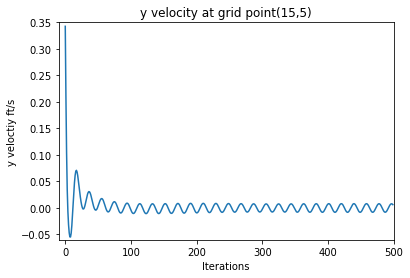

In [48]:
plt.plot(residual)
plt.title('y velocity at grid point(15,5)')
plt.xlabel('Iterations')
plt.ylabel('y veloctiy ft/s')
plt.xlim([-10,500])
plt.ylim([-0.06,0.35])

The plot above shows the velocity in the y direction at grid point (15,5) over the iterations. One can see that very quickly, the velocity decays and oscillates around steady state value around 100 iterations. Now that we are sure that our solution has reached some form of steady state, we can plot our results. 

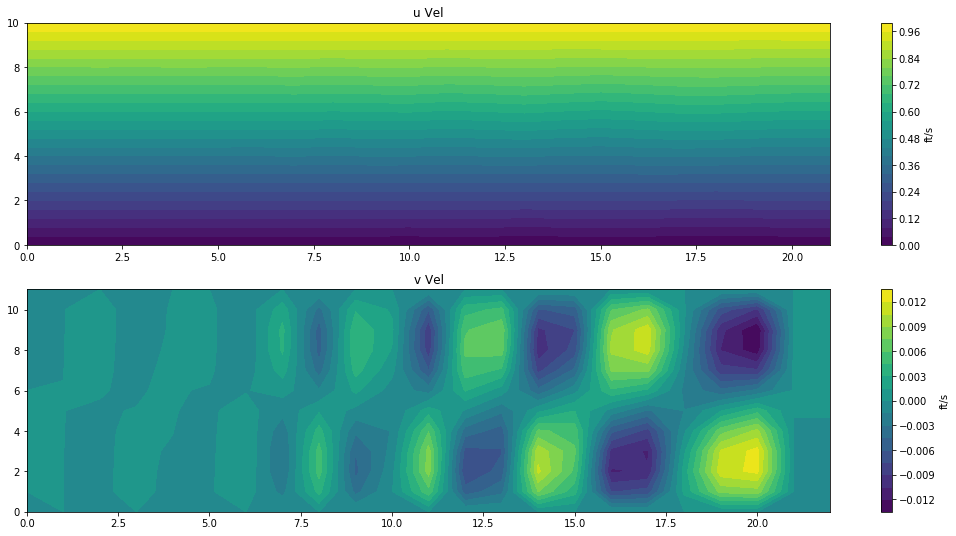

In [55]:
levels = 24 # number of contours
f = plt.figure(figsize=(18,9))
plt.subplot(2, 1, 1,)
plt.contourf(np.transpose(u),levels)
plt.colorbar(label='ft/s')
plt.title('u Vel')
plt.subplot(2,1,2)
plt.contourf(np.transpose(v),levels)
plt.title('v Vel')
plt.colorbar(label='ft/s')
plt.show()

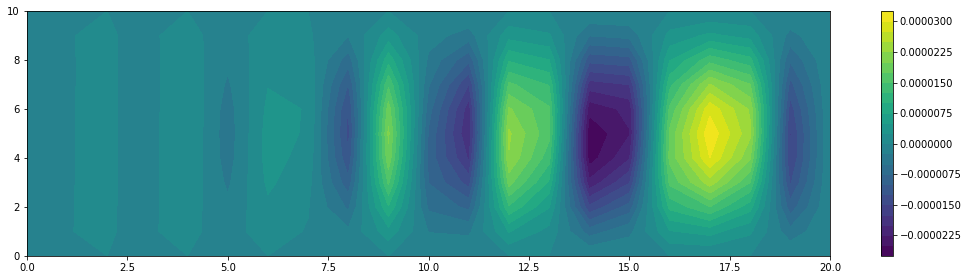

In [56]:
f = plt.figure(figsize=(18,4.5))
x = np.arange(0,p.shape[0], 1)
y = np.arange(0,p.shape[1], 1)
X, Y = np.meshgrid(x, y)
plt.contourf(X,Y,np.transpose(p),levels)
plt.colorbar()

The solution of u at each location i appears to be linear (as the analytical solution proves), but we can plot along one section of the flow to get the following plot. 

Text(0.5, 1.0, 'Velocity profile')

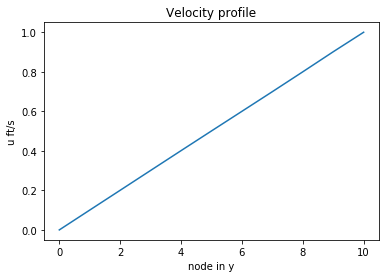

In [60]:
plt.plot(u[12,:])
plt.xlabel('node in y')
plt.ylabel('u ft/s')
plt.title('Velocity profile')